# Practice-Session 3

### Find the players who took a shot after the 52nd minute in the African Cup of Nations final

In [110]:
from statsbombpy import sb
import warnings
#ignore by message
warnings.filterwarnings("ignore", message="credentials were not supplied")

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from tqdm import tqdm

In [111]:
match_id = 3923881

In [112]:
df_events = sb.events(match_id=match_id)

In [113]:
df_events

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Nigeria,775,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Côte d'Ivoire,3374,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Nigeria,775,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Côte d'Ivoire,3374,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Côte d'Ivoire,3374,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Tactical,103.0,Jean Thierry Lazare Amani,23957.0,NaN,Côte d'Ivoire,3374,00:46:41.128,Substitution,NaN
2695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Nigeria,775,00:27:25.263,Tactical Shift,NaN
2696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Nigeria,775,00:42:35.583,Tactical Shift,NaN
2697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Côte d'Ivoire,3374,00:42:45.687,Tactical Shift,NaN


In [114]:
# convert to `timedelta` in order to make easy for time search
df_events.timestamp = pd.to_timedelta(df_events.timestamp)

In [115]:
df_goals_45 = df_events[
    (df_events["timestamp"] > "00:45:00") & (df_events["team"] == "Nigeria")  & (df_events["type"] == "Shot")
]
df_goals_45

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
2489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Nigeria,775,0 days 00:50:12.092000,Shot,NaN


In [116]:
df_shot = df_events.loc[event_idx].squeeze()

In [117]:
# who shot?
df_shot.player

'Alhassan Yusuf'

In [118]:
df_shot.shot_freeze_frame

[{'location': [102.8, 43.1],
  'player': {'id': 43072, 'name': 'Jean-Philippe Krasso'},
  'position': {'id': 23, 'name': 'Center Forward'},
  'teammate': False},
 {'location': [109.7, 39.2],
  'player': {'id': 36539, 'name': 'Wilfried Stephane Singo'},
  'position': {'id': 2, 'name': 'Right Back'},
  'teammate': False},
 {'location': [107.4, 44.2],
  'player': {'id': 7713, 'name': 'Obite Evan Ndicka'},
  'position': {'id': 5, 'name': 'Left Center Back'},
  'teammate': False},
 {'location': [109.8, 42.0],
  'player': {'id': 27133, 'name': 'Odilon Kossonou'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'teammate': False},
 {'location': [108.9, 49.1],
  'player': {'id': 10039, 'name': 'Ghislain Konan'},
  'position': {'id': 6, 'name': 'Left Back'},
  'teammate': False},
 {'location': [104.2, 49.8],
  'player': {'id': 7023, 'name': 'Franck Yannick Kessié'},
  'position': {'id': 15, 'name': 'Left Center Midfield'},
  'teammate': False},
 {'location': [105.0, 39.7],
  'player': {

In [119]:
df_freeze = pd.DataFrame(df_shot.shot_freeze_frame)

In [120]:
df_freeze

,location,player,position,teammate
0,"[102.8, 43.1]","{'id': 43072, 'name': 'Jean-Philippe Krasso'}","{'id': 23, 'name': 'Center Forward'}",False
1,"[109.7, 39.2]","{'id': 36539, 'name': 'Wilfried Stephane Singo'}","{'id': 2, 'name': 'Right Back'}",False
2,"[107.4, 44.2]","{'id': 7713, 'name': 'Obite Evan Ndicka'}","{'id': 5, 'name': 'Left Center Back'}",False
3,"[109.8, 42.0]","{'id': 27133, 'name': 'Odilon Kossonou'}","{'id': 3, 'name': 'Right Center Back'}",False
4,"[108.9, 49.1]","{'id': 10039, 'name': 'Ghislain Konan'}","{'id': 6, 'name': 'Left Back'}",False
5,"[104.2, 49.8]","{'id': 7023, 'name': 'Franck Yannick Kessié'}","{'id': 15, 'name': 'Left Center Midfield'}",False
6,"[105.0, 39.7]","{'id': 3017, 'name': 'Ibrahim Sangaré'}","{'id': 10, 'name': 'Center Defensive Midfield'}",False
7,"[102.4, 30.0]","{'id': 212489, 'name': 'Oumar Diakité'}","{'id': 17, 'name': 'Right Wing'}",False
8,"[94.7, 40.7]","{'id': 23957, 'name': 'Jean Thierry Lazare Ama...","{'id': 13, 'name': 'Right Center Midfield'}",False
9,"[91.9, 51.4]","{'id': 105392, 'name': 'Simon Adingra'}","{'id': 21, 'name': 'Left Wing'}",False


In [121]:
highlight_players = ["Alhassan Yusuf"] 

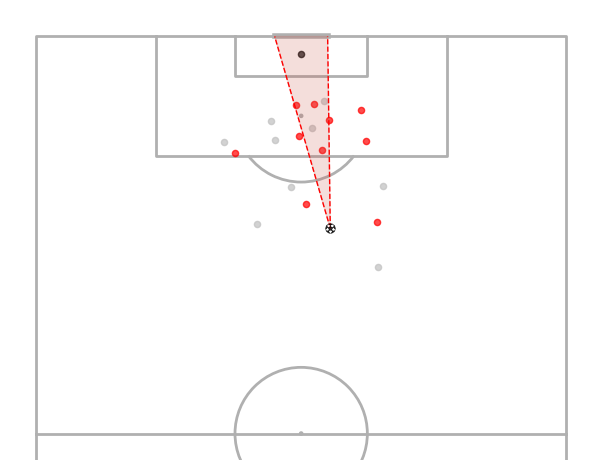

In [122]:
pitch = VerticalPitch(
    pitch_type="statsbomb",
    half=True
)

fig, ax = pitch.draw()

shot_x, shot_y = df_shot.location

pitch.scatter(
    shot_x, shot_y,
    marker="football",
    s=50, alpha=0.7, zorder=999,
    ax=ax
)

pitch.lines(
    shot_x, shot_y, 120, 36,
    color="red", linestyle="--", linewidth=1,
    ax=ax
)
pitch.lines(
    shot_x, shot_y, 120, 44,
    color="red", linestyle="--", linewidth=1,
    ax=ax
)

pitch.goal_angle(
    shot_x, shot_y, alpha=0.2, zorder=1.1,
    color='#cb5a4c', goal='right',
    ax=ax
)

for row in df_freeze.itertuples():

    player_x, player_y = row.location
    position = row.position

    if position["name"] == "Goalkeeper":
        pitch.scatter(
            player_x, player_y,
            c="black", s=20, alpha=0.7,
            ax=ax
        )
    else:
        pitch.scatter(
            player_x, player_y,
            c="silver" if row.teammate else "red", s=20, alpha=0.7,
            ax=ax
        )

    if row.teammate:
        player_name = row.player["name"]        
        if player_name in highlight_players:
            pitch.annotate(player_name, (player_x, player_y - 15), ax=ax)

plt.show()